In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
# read results
co_kriging_input = pd.read_csv("../cokriging/exp_co_kriging_input.csv", index_col=0)
co_kriging_output = pd.read_csv("../cokriging/exp_co_kriging_output.csv", index_col=0)
# return back to original directory
# merge input and output
co_kriging_results = pd.merge(
    co_kriging_input, co_kriging_output, left_index=True, right_index=True
)
# make normalized_mae and normalized_rmse to be absolute value
co_kriging_results["normalized_mae"] = co_kriging_results["normalized_mae"].abs()
co_kriging_results["normalized_rmse"] = co_kriging_results["normalized_rmse"].abs()

# read results for hk
hk_input = pd.read_csv("../hk/exp_hk_input.csv", index_col=0)
hk_output = pd.read_csv("../hk/exp_hk_output.csv", index_col=0)
# merge input and output
hk_results = pd.merge(hk_input, hk_output, left_index=True, right_index=True)
# make normalized_mae and normalized_rmse to be absolute value
hk_results["normalized_mae"] = hk_results["normalized_mae"].abs()
hk_results["normalized_rmse"] = hk_results["normalized_rmse"].abs()


# read results for mf scaled
mf_scaled_input = pd.read_csv("../mf_scaled/exp_mf_scale_input.csv", index_col=0)
mf_scaled_output = pd.read_csv("../mf_scaled/exp_mf_scale_output.csv", index_col=0)
# merge input and output
mf_scaled_results = pd.merge(
    mf_scaled_input, mf_scaled_output, left_index=True, right_index=True
)
# make normalized_mae and normalized_rmse to be absolute value
mf_scaled_results["normalized_mae"] = mf_scaled_results["normalized_mae"].abs()
mf_scaled_results["normalized_rmse"] = mf_scaled_results["normalized_rmse"].abs()


# read results for mf-rbf-kriging
mf_rbf_kriging_input = pd.read_csv(
    "../mf_rbf_kriging/exp_mf_rbf_input.csv", index_col=0
)
mf_rbf_kriging_output = pd.read_csv(
    "../mf_rbf_kriging/exp_mf_rbf_output.csv", index_col=0
)
# merge input and output
mf_rbf_kriging_results = pd.merge(
    mf_rbf_kriging_input, mf_rbf_kriging_output, left_index=True, right_index=True
)
# make normalized_mae and normalized_rmse to be absolute value
mf_rbf_kriging_results["normalized_mae"] = mf_rbf_kriging_results[
    "normalized_mae"
].abs()
mf_rbf_kriging_results["normalized_rmse"] = mf_rbf_kriging_results[
    "normalized_rmse"
].abs()


# load kriging results
kriging_input = pd.read_csv("../kriging/exp_kriging_input.csv", index_col=0)
kriging_output = pd.read_csv("../kriging/exp_kriging_output.csv", index_col=0)
# merge input and output
kriging_results = pd.merge(
    kriging_input, kriging_output, left_index=True, right_index=True
)
# make normalized_mae and normalized_rmse to be absolute value
kriging_results["normalized_mae"] = kriging_results["normalized_mae"].abs()
kriging_results["normalized_rmse"] = kriging_results["normalized_rmse"].abs()
# remove results of "Forrestor_1a"
kriging_results = kriging_results[kriging_results["problem"] != "Forrester_1a"]

In [5]:
mf_rbf_kriging_results.problem.unique()

array(['mf_Bohachevsky', 'mf_Booth', 'mf_Borehole', 'mf_CurrinExp',
       'mf_Hartman3', 'mf_Hartman6', 'mf_Himmelblau', 'mf_Park91A',
       'mf_Park91B', 'mf_Sixhump'], dtype=object)

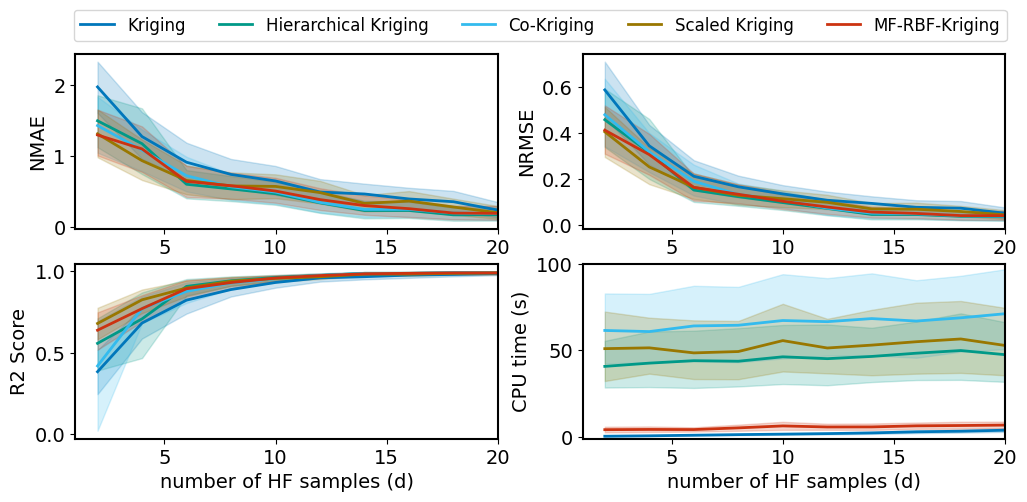

In [9]:
# get the results for 120 samples
hk_results_120 = hk_results[hk_results["num_lf"] == 100]
ck_results_120 = co_kriging_results[co_kriging_results["num_lf"] == 100]
scaled_results_120 = mf_scaled_results[mf_scaled_results["num_lf"] == 100]
mf_rbf_results_120 = mf_rbf_kriging_results[mf_rbf_kriging_results["num_lf"] == 100]

# remove Kriging results where the num_sample is larger than 20
kriging_results = kriging_results[kriging_results["num_sample"] <= 20]

# Create subplots for each metric
fig, axes = plt.subplots(2, 2, figsize=(12, 5))
# Plotting mae
sns.lineplot(
    data=kriging_results,
    x="num_sample",
    y="normalized_mae",
    color="#0077BB",
    linewidth=2,
    ax=axes[0, 0],
)
sns.lineplot(
    data=hk_results_120,
    x="num_hf",
    y="normalized_mae",
    color="#009988",
    linewidth=2,
    ax=axes[0, 0],
)
sns.lineplot(
    data=ck_results_120,
    x="num_hf",
    y="normalized_mae",
    color="#33BBEE",
    linewidth=2,
    ax=axes[0, 0],
)
sns.lineplot(
    data=scaled_results_120,
    x="num_hf",
    y="normalized_mae",
    color="#997700",
    linewidth=2,
    ax=axes[0, 0],
)
sns.lineplot(
    data=mf_rbf_results_120,
    x="num_hf",
    y="normalized_mae",
    color="#CC3311",
    linewidth=2,
    ax=axes[0, 0],
)
axes[0, 0].set_xlim([1, 20])
axes[0, 0].set_xlabel(" ", fontsize=14)
axes[0, 0].set_ylabel("NMAE", fontsize=14)

# Plotting rmse
sns.lineplot(
    data=kriging_results,
    x="num_sample",
    y="normalized_rmse",
    color="#0077BB",
    linewidth=2,
    ax=axes[0, 1],
)
sns.lineplot(
    data=hk_results_120,
    x="num_hf",
    y="normalized_rmse",
    color="#009988",
    linewidth=2,
    ax=axes[0, 1],
)
sns.lineplot(
    data=ck_results_120,
    x="num_hf",
    y="normalized_rmse",
    color="#33BBEE",
    linewidth=2,
    ax=axes[0, 1],
)
sns.lineplot(
    data=scaled_results_120,
    x="num_hf",
    y="normalized_rmse",
    color="#997700",
    linewidth=2,
    ax=axes[0, 1],
)
sns.lineplot(
    data=mf_rbf_results_120,
    x="num_hf",
    y="normalized_rmse",
    color="#CC3311",
    linewidth=2,
    ax=axes[0, 1],
)
axes[0, 1].set_xlabel(" ", fontsize=14)
axes[0, 1].set_ylabel("NRMSE", fontsize=14)
axes[0, 1].set_xlim([1, 20])

# Plotting r2
sns.lineplot(
    data=kriging_results,
    x="num_sample",
    linewidth=2,
    y="r2",
    color="#0077BB",
    ax=axes[1, 0],
)
sns.lineplot(
    data=hk_results_120,
    x="num_hf",
    y="r2",
    linewidth=2,
    color="#009988",
    ax=axes[1, 0],
)
sns.lineplot(
    data=ck_results_120,
    x="num_hf",
    linewidth=2,
    y="r2",
    color="#33BBEE",
    ax=axes[1, 0],
)
sns.lineplot(
    data=scaled_results_120,
    x="num_hf",
    linewidth=2,
    y="r2",
    color="#997700",
    ax=axes[1, 0],
)
sns.lineplot(
    data=mf_rbf_results_120,
    x="num_hf",
    linewidth=2,
    y="r2",
    color="#CC3311",
    ax=axes[1, 0],
)

axes[1, 0].set_xlabel("number of HF samples (d)", fontsize=14)
axes[1, 0].set_ylabel("R2 Score", fontsize=14)
axes[1, 0].set_xlim([1, 20])
# Plotting cpu time
sns.lineplot(
    data=kriging_results,
    x="num_sample",
    linewidth=2,
    y="cpu_time",
    label="Kriging",
    color="#0077BB",
    ax=axes[1, 1],
)
sns.lineplot(
    data=hk_results_120,
    x="num_hf",
    linewidth=2,
    y="cpu_time",
    color="#009988",
    label="Hierarchical Kriging",
    ax=axes[1, 1],
)
sns.lineplot(
    data=ck_results_120,
    x="num_hf",
    linewidth=2,
    y="cpu_time",
    label="Co-Kriging",
    color="#33BBEE",
    ax=axes[1, 1],
)
sns.lineplot(
    data=scaled_results_120,
    x="num_hf",
    linewidth=2,
    y="cpu_time",
    label="Scaled Kriging",
    color="#997700",
    ax=axes[1, 1],
)
sns.lineplot(
    data=mf_rbf_results_120,
    x="num_hf",
    linewidth=2,
    y="cpu_time",
    label="MF-RBF-Kriging",
    color="#CC3311",
    ax=axes[1, 1],
)
axes[1, 1].set_xlabel("number of HF samples (d)", fontsize=14)
axes[1, 1].set_ylabel("CPU time (s)", fontsize=14)
axes[1, 1].set_xlim([1, 20])
axes[1, 1].set_ylim([-1, 100])

# set font size
font_size = 14
plt.legend(loc="upper center", bbox_to_anchor=(-0.1, 2.5), ncol=5, fontsize=12)
# plt.subplots_adjust(left=0.1, right=0.9, wspace=0.3)
axes[0, 0].tick_params(labelsize=font_size)
axes[0, 1].tick_params(labelsize=font_size)
axes[1, 0].tick_params(labelsize=font_size)
axes[1, 1].tick_params(labelsize=font_size)
for i in range(2):
    for j in range(2):
        axes[i, j].tick_params(axis="both", which="major", labelsize=font_size)
        # set the line width of the axis
        for axis in ["top", "bottom", "left", "right"]:
            axes[i, j].spines[axis].set_linewidth(1.5)

# Adjust layout
plt.savefig("comparison_at_100lf_samples.png", dpi=300, bbox_inches="tight")
plt.savefig("comparison_at_100lf_samples.pdf", dpi=300, bbox_inches="tight")
plt.savefig("comparison_at_100lf_samples.svg", dpi=300, bbox_inches="tight")
plt.show()

In [10]:
problem_sets = [
    "Bohachevsky",
    "Booth",
    "Borehole",
    "CurrinExp",
    "Hartman3",
    "Hartman6",
    "Park91A",
    "Park91B",
    "Sixhump",
]
dimensions = [2, 2, 8, 2, 3, 6, 4, 4, 2]
r2 = [0.857, 0.925, 1.000, 0.997, -0.196, 0.712, 0.994, 1.0000, 0.833]

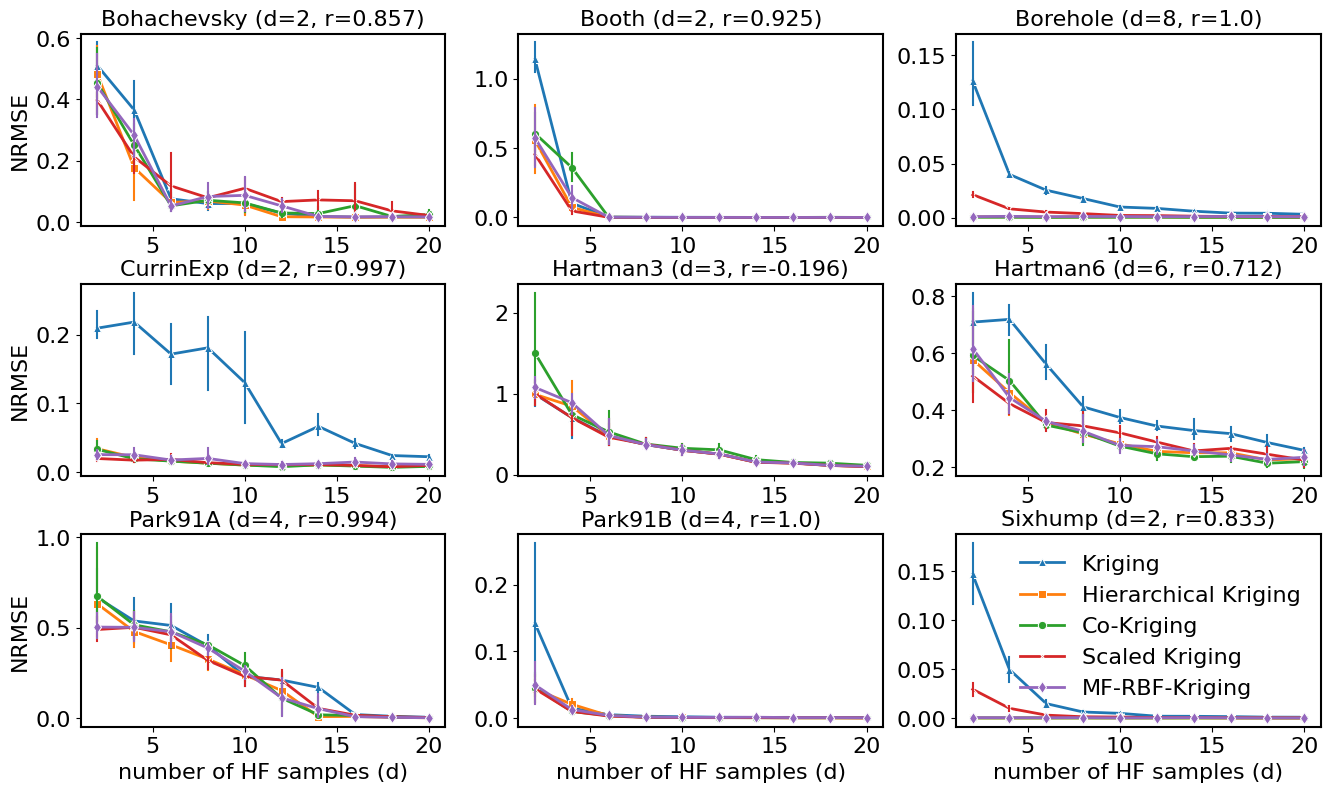

In [11]:
problem_set = hk_results_120["problem"].unique()

font_size = 16
fig, ax = plt.subplots(3, 3, figsize=(16, 9))
# for problem in problem_set:

for ii in range(3):
    for jj in range(3):
        problem = problem_set[ii * 3 + jj]
        hk_result = hk_results_120[(hk_results_120["problem"] == problem)]
        ck_result = ck_results_120[(ck_results_120["problem"] == problem)]
        sk_result = scaled_results_120[(
            scaled_results_120["problem"] == problem)]
        sf_result = kriging_results[(kriging_results["problem"] == problem)]
        mf_result = mf_rbf_results_120[(
            mf_rbf_results_120["problem"] == problem)]
        # Plot normalized RMSE on the left y-axis
        if ii == 2:
            ax[ii, jj].set_xlabel(
                "number of HF samples (d)", fontsize=font_size)
        else:
            ax[ii, jj].set_xlabel(" ")
        if jj == 0:
            ax[ii, jj].set_ylabel("NRMSE", fontsize=font_size)
        else:
            ax[ii, jj].set_ylabel(
                " ",
            )
        sns.lineplot(
            data=sf_result,
            x="num_sample",
            marker="^",
            legend="full",
            linewidth=2,
            y="normalized_rmse",
            ax=ax[ii, jj],
            err_style="bars",
            label="Kriging",
        )
        sns.lineplot(
            data=hk_result,
            x="num_hf",
            marker="s",
            legend="full",
            linewidth=2,
            # linestyle="dashed",
            y="normalized_rmse",
            ax=ax[ii, jj],
            err_style="bars",
            label="Hierarchical Kriging",
        )
        sns.lineplot(
            data=ck_result,
            x="num_hf",
            marker="o",
            legend="full",
            linewidth=2,
            y="normalized_rmse",
            ax=ax[ii, jj],
            err_style="bars",
            label="Co-Kriging",
        )
        sns.lineplot(
            data=sk_result,
            x="num_hf",
            marker="x",
            legend="full",
            linewidth=2,
            y="normalized_rmse",
            ax=ax[ii, jj],
            err_style="bars",
            label="Scaled Kriging",
        )
        sns.lineplot(
            data=mf_result,
            x="num_hf",
            marker="d",
            legend="full",
            linewidth=2,
            y="normalized_rmse",
            ax=ax[ii, jj],
            err_style="bars",
            label="MF-RBF-Kriging",
        )
        ax[ii, jj].tick_params(axis="y", labelsize=font_size)
        # set the font of axis and y-axis precision
        ax[ii, jj].tick_params(axis="both", which="major", labelsize=font_size)
        # set the line width of the axis
        for axis in ["top", "bottom", "left", "right"]:
            ax[ii, jj].spines[axis].set_linewidth(1.5)
        if ii == 2 and jj == 2:
            ax[ii, jj].legend(
                loc="upper right",
                fontsize=font_size,
                frameon=False,
            )
        else:
            ax[ii, jj].get_legend().remove()
        # get title info
        title = (
            problem_sets[ii * 3 + jj]
            + " (d="
            + str(dimensions[ii * 3 + jj])
            + ", r="
            + str(r2[ii * 3 + jj])
            + ")"
        )
        ax[ii, jj].set_title(title, fontsize=font_size)
        # set space between subplots
        plt.subplots_adjust(
            hspace=0.30,
        )
# plt.savefig("test.png",
#             dpi=300, bbox_inches="tight")
# plt.savefig("mf_rbf_kriging_correlation_influence.pdf",
#             dpi=300, bbox_inches="tight")
# plt.savefig("mf_rbf_kriging_correlation_influence.svg",
#             dpi=300, bbox_inches="tight")
plt.show()